# Homework 1 - Main Problems


## Problem 1 - LP formulation and Pyomo Solve
### A)
A company manufactures 3 products: P1, P2 and P3, using 3 processesing units: U1, U2, U3. The goal is to identify the optimal production schedule for a month that maximizes total profit. The following information is given:
- To make P1 all units must be used. 1 hr/kg is required in U1, 2hrs/kg is required in U2, 1 hr/kg is required in U3,
- To make P2: U1 and U3 must be used (3hrs/kg in U1, 2 hrs/kg in U3),
- To make P3: U1 and U2 must be used (1hr/kg in U1, 4hrs/kg in U2),
- The total max number of operational hours for each unit per month is: 430, 460, 450 for U1, U2, U3 respectively. 
- Total profit per kg of product produced is: \$40, \$20, \$50 for P1, P2, P3 respectively.

**Formulate a Linear Programming problem** and solve in Pyomo to find the optimal profit and schedule. Just assume you are writing this problem for 1 month so there is NO need to worry about units of time.

**Add comments in your Pyomo formulation** to explain your variables,  constraints, bounds, and objective function.

In [32]:
# Pyomo formulation for Problem 1

from pyomo.environ import *
m = ConcreteModel()

#we have 3 products and 3 units, lets declare a set
m.idx = Set(initialize=[1,2,3])

# Declare bounds on units operational hours
m.op_bounds = Param(m.idx, initialize={1:430, 2:460, 3:450})

# Declare profits for each product
m.profits = Param(m.idx, initialize={1:40, 2:20, 3:50})

# declare variables
m.products = Var(m.idx, within=NonNegativeReals)

#Creating data based on operational costs for products and associated units
op_costs = {(1,1):1, (1,2):2, (1,3):1, 
            (2,1):3, (2,2):0, (2,3):2,
            (3,1):1, (3,2):4, (3,3):0}


def con(m, i):
    return sum(m.products[j]*op_costs[j,i] for j in m.idx) <= m.op_bounds[i]
m.con = Constraint(m.idx, rule=con)

# set objective function
def obj(m):
    return sum(m.products[i]*m.profits[i] for i in m.idx)
m.obj = Objective(rule = obj, sense = maximize)

solver = SolverFactory('glpk')

solver.solve(m)
#m.pprint()
print("\t\tAmount")
for i in m.idx:
    print(f"product {i}: \t{value(m.products[i])}")

print(f"\nTotal profit: {value(m.obj)}")

		Amount
product 1: 	230.0
product 2: 	66.6666666666667
product 3: 	0.0

Total profit: 10533.333333333334


### A) Results 
Optimal Objective = 

Optimal Values of Variables: 

### B) Effects of changes to parameters
Assume that you have the ability to increase the operational limit of one of the processes. Which one would you recommend expansion in and why?

(Provide quantitative reasoning for answer, if you want to resolve formulation, it is up to you but not necessary)
### B) Answer and Justification:

$\color{blue}{\text{Solution:}}$
Let's start with our optimum solution from part $A$.

$\begin{array}{ll} & \text { Amount } \\ 
\text { product 1: } & 230.0 \\ \text { product 2: } & 66.6667 \\ \text { product 3: } & 0.0\end{array}$

$\textbf{And the constraints:}$

Constraint1: 1$*$product1 + 3$*$product2 + 1$*$product3 $\leq$ 430.0

Constraint2: 2$*$product1 + 4$*$product3 $\leq$ 460.0

Constraint3: 1$*$products1 + 2$*$product2 $\leq$ 450.0

Now let's check for the constraints that are active, by plugging in our optimum

Constraint1: $430.0 \rightarrow$ active

Constraint2: $460.0 \rightarrow$ active

Constraint3: $363.something \rightarrow$ inactive

$\textbf{What does this imply?}$

Our objective function will be affected only when the active constraints are changed and in this case, constraints 1 and 2.

lets check constraints 1 and 2, because the profit associated with product 1 and 3 is high, the solver will try to increase the quantity of product 1 or 3 based on constraints.

Constraint1: 1$*$product1 + 3$*$product2 + 1$*$product3 $\leq$ 430.0

Constraint2: 2$*$product1 + 4$*$product3 $\leq$ 460.0

A closer look at constraint 2 shows that product1 would be maximized over product3. This is because, we can produce twice the quantity of product1 in comparison to product3 and still satisfy the constraint. And this will result in more profit. So, based on the above reasoning, for simplicity, we can modify our constraints as:

Modified Constraint1: 1$*$product1 + 3$*$product2 + 1$*$product3 $\leq$ 430.0

Modified Constraint2: 2$*$product1 + 4$*$product3 $\leq$ 460.0

$\textbf{Based on our modified constraints, which one would you think favors for more profit?}$

Its constraint 2, because it only affects product1 and hence more profit. So, changing the operational hours of unit 2 will help us the most.

But it should be kept in mind that this reasoning is valid as long as constraint 3 is inactive. Once it is active, the solution might change.


In [31]:
# sanity check : Increase operational hours of each unit by 50 one at a time

#----------------------------------------------------------------------------
# increasing operational hours of unit 1
from pyomo.environ import *
m = ConcreteModel()
m.idx = Set(initialize=[1,2,3])
m.op_bounds = Param(m.idx, initialize={1:480, 2:460, 3:450})
m.profits = Param(m.idx, initialize={1:40, 2:20, 3:50})
m.products = Var(m.idx, within=NonNegativeReals)
op_costs = {(1,1):1, (1,2):2, (1,3):1, 
            (2,1):3, (2,2):0, (2,3):2,
            (3,1):1, (3,2):4, (3,3):0}
def con(m, i):
    return sum(m.products[j]*op_costs[j,i] for j in m.idx) <= m.op_bounds[i]
m.con = Constraint(m.idx, rule=con)
def obj(m):
    return sum(m.products[i]*m.profits[i] for i in m.idx)
m.obj = Objective(rule = obj, sense = maximize)
solver = SolverFactory('glpk')
solver.solve(m)
print("increasing operational hours of unit 1 by 50:")
print("\t\tAmount")
for i in m.idx:
    print(f"product {i}: \t{value(m.products[i])}")
print(f"\nTotal profit: {value(m.obj)}")

#----------------------------------------------------------------------------
# increasing operational hours of unit 2
from pyomo.environ import *
m = ConcreteModel()
m.idx = Set(initialize=[1,2,3])
m.op_bounds = Param(m.idx, initialize={1:430, 2:510, 3:450})
m.profits = Param(m.idx, initialize={1:40, 2:20, 3:50})
m.products = Var(m.idx, within=NonNegativeReals)
op_costs = {(1,1):1, (1,2):2, (1,3):1, 
            (2,1):3, (2,2):0, (2,3):2,
            (3,1):1, (3,2):4, (3,3):0}
def con(m, i):
    return sum(m.products[j]*op_costs[j,i] for j in m.idx) <= m.op_bounds[i]
m.con = Constraint(m.idx, rule=con)
def obj(m):
    return sum(m.products[i]*m.profits[i] for i in m.idx)
m.obj = Objective(rule = obj, sense = maximize)
solver = SolverFactory('glpk')
solver.solve(m)
print("\nincreasing operational hours of unit 2 by 50:")
print("\t\tAmount")
for i in m.idx:
    print(f"product {i}: \t{value(m.products[i])}")
print(f"\nTotal profit: {value(m.obj)}")

#----------------------------------------------------------------------------
# increasing operational hours of unit 3
from pyomo.environ import *
m = ConcreteModel()
m.idx = Set(initialize=[1,2,3])
m.op_bounds = Param(m.idx, initialize={1:430, 2:460, 3:500})
m.profits = Param(m.idx, initialize={1:40, 2:20, 3:50})
m.products = Var(m.idx, within=NonNegativeReals)
op_costs = {(1,1):1, (1,2):2, (1,3):1, 
            (2,1):3, (2,2):0, (2,3):2,
            (3,1):1, (3,2):4, (3,3):0}
def con(m, i):
    return sum(m.products[j]*op_costs[j,i] for j in m.idx) <= m.op_bounds[i]
m.con = Constraint(m.idx, rule=con)
def obj(m):
    return sum(m.products[i]*m.profits[i] for i in m.idx)
m.obj = Objective(rule = obj, sense = maximize)
solver = SolverFactory('glpk')
solver.solve(m)
print("\nincreasing operational hours of unit 3 by 50:")
print("\t\tAmount")
for i in m.idx:
    print(f"product {i}: \t{value(m.products[i])}")
print(f"\nTotal profit: {value(m.obj)}")

increasing operational hours of unit 1 by 50:
		Amount
product 1: 	230.0
product 2: 	83.3333333333333
product 3: 	0.0

Total profit: 10866.666666666666

increasing operational hours of unit 2 by 50:
		Amount
product 1: 	255.0
product 2: 	58.3333333333333
product 3: 	0.0

Total profit: 11366.666666666666

increasing operational hours of unit 3 by 50:
		Amount
product 1: 	230.0
product 2: 	66.6666666666667
product 3: 	0.0

Total profit: 10533.333333333334


## Problem 2

### A)
Write a Pyomo formulation to minimize the Griewank benchmark problem for global optimization. It's function is given as ($d$ is dimension):

$ f(x) = (\sum_{i=1}^d \frac{x_i^2}{4000}) - \prod_{i=1}^d cos( \frac{x_i}{\sqrt i}) + 1 $

where in all dimensions the bounds are: $ - 5 \le x \le 5 $

Since this benchmark can be generated for any dimension d >= 2, write your Pyomo formulation with sets, so that it can be easily edited and solved for any dimension.

Solve Problem for 2, 3 and 10 dimensions, using an appropriate solver.



In [3]:
# Pyomo formulation for Problem 2

from pyomo.environ import *

#dimension = input('What is the dimension of the problem, (must be a +ve integer)?\n')
dim = [2,3,10]
for dimension in dim:
    
    m = ConcreteModel()
    # declare variables
    m.idx = Set(initialize = RangeSet(int(dimension)))

    def xbounds(m):
        return (-5,5)

    m.x = Var(m.idx, within=Reals, bounds = xbounds)

    def Griewank(m):
        return sum(m.x[i]**2/4000 for i in m.idx) - prod(cos(m.x[i]/sqrt(i)) for i in m.idx) + 1

    # set objective function
    m.obj = Objective(rule = Griewank, sense = minimize)

    solver = SolverFactory('ipopt')

    solver.solve(m)
    #m.pprint()
    print('\nSolving for dimension:'+str(dimension))
    print("Optimum location:")
    for i in m.idx:
        print(f"x{i}: \t{value(m.x[i])}")

    print(f"Optimum objective function: {value(m.obj)}")


Solving for dimension:2
Optimum location:
x1: 	0.0
x2: 	0.0
Optimum objective function: 0.0

Solving for dimension:3
Optimum location:
x1: 	0.0
x2: 	0.0
x3: 	0.0
Optimum objective function: 0.0

Solving for dimension:10
Optimum location:
x1: 	0.0
x2: 	0.0
x3: 	0.0
x4: 	0.0
x5: 	0.0
x6: 	0.0
x7: 	0.0
x8: 	0.0
x9: 	0.0
x10: 	0.0
Optimum objective function: 0.0


### A) Optimal solutions for: 

2d: $[x_1, x_2] = [0,0]$ and optimum objective = $0$

3d: $[x_1, x_2, x_3] = [0,0,0]$ and optimum objective = $0$

10d: $[x_1, x_2, x_3, x_4, x_5, x_6, x_7, x_8, x_9, x_{10}] = [0,0,0,0,0,0,0,0,0,0]$ and optimum objective = $0$


### B) Plotting

Plot the griewank function for 2 dimensions using Python's plotting tools.

Text(0.5, 0, 'f(x,y)')

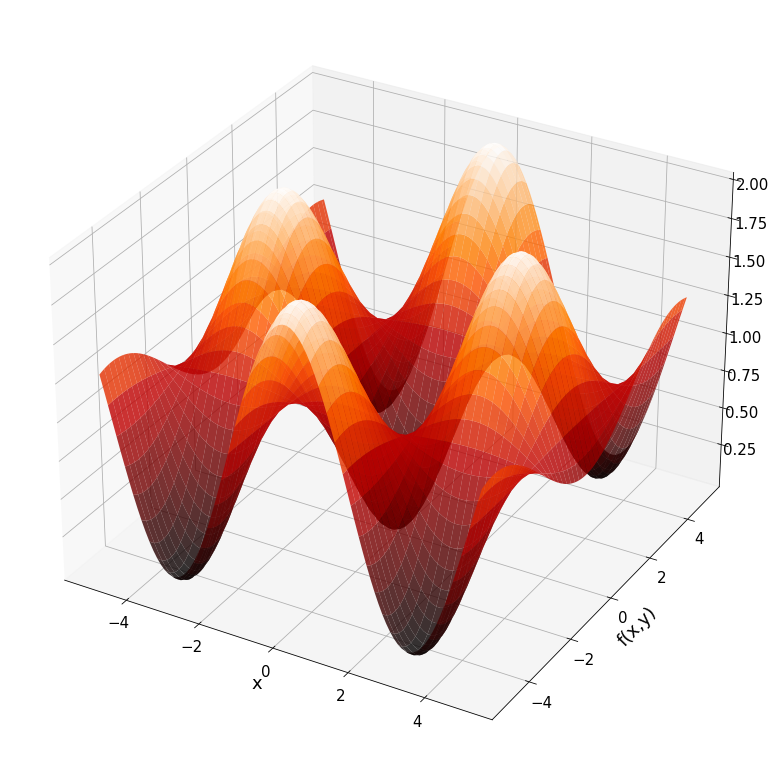

In [4]:
# Plotting for Problem 2 - Part B
import numpy as np
import matplotlib.pyplot as plt

def Griewank(x,y):
    return (x**2/4000 + y**2/4000) - (np.multiply(np.cos(x),np.cos(y/sqrt(2)))) + 1

x = np.linspace(-5,5,100)
y = np.linspace(-5,5,100)
#------------------------------------------------------------------------------------------------------------------
#plotting (x,y) vs f(x,y)
X,Y = np.meshgrid(x,y)
Z = Griewank(X,Y)
fig = plt.figure(figsize = [18,14])
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap='gist_heat',alpha=0.8, edgecolor='none')
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.zaxis.set_tick_params(labelsize=15)
ax.set_xlabel('x', fontsize=18)
ax.set_ylabel('y', fontsize=18)
ax.set_ylabel('f(x,y)', fontsize=18)

## Problem 3 - Integer Formulation
A retail and shipping company has four possible locations to build warehouses. The cost of locating a warehouse at location  𝐶𝑖  is fixed and known in  $ . There are 9 total customers, each of which must be supplied by at least 1 warehouse. Based on location and infastructure, it is not possible for all warehouses to supply to all customers. A network of possible matches is provided as an image in your workspace. Write an integer optimization problem to identify the optimal solution to minimize the total cost. Create a random set of positive costs in the range of  [5−10]  million dollars for each warehouse  𝐶𝑖  and solve the problem for your values.

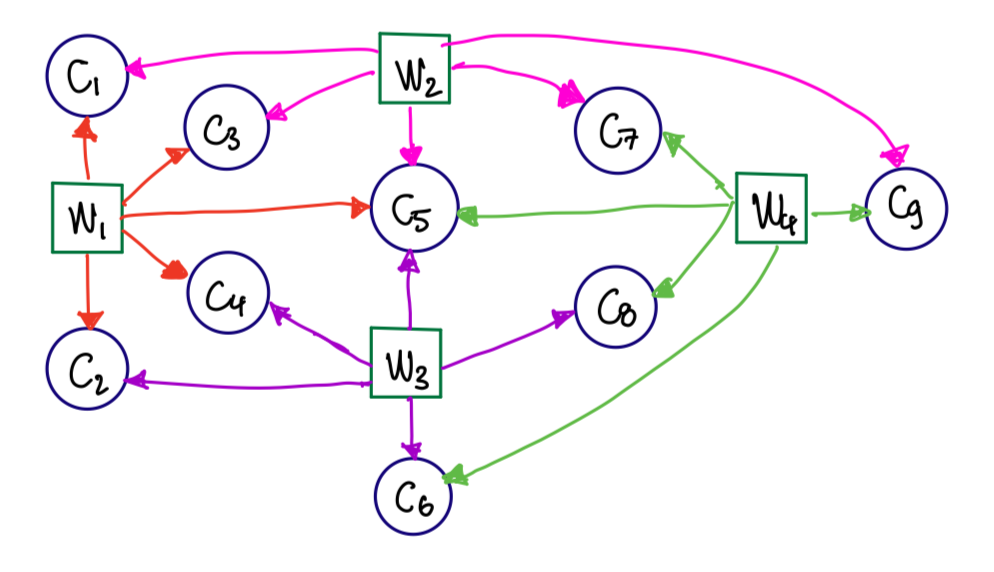

In [6]:
# Problem 3 Solution


from pyomo.environ import *
m = ConcreteModel()

#we have 4 warehouses and 9 customers, lets declare a set
m.Widx = Set(initialize=[1,2,3,4])
m.Cidx = Set(initialize=[1,2,3,4,5,6,7,8,9])

# declare variables
m.customers = Var(m.Cidx, within=NonNegativeIntegers)
m.warehouses = Var(m.Widx, within=NonNegativeIntegers)
m.bins = Var(m.Widx, within=Binary)

#declare costs
m.costs = Param(m.Widx, initialize={1:5, 2:4, 3:8, 4:6})#in million

#Creating data based on operational costs for products and associated units
networks = {(1,1):1, (1,2):1, (1,3):1, (1,4):1, (1,5):1, (1,6):0, (1,7):0, (1,8):0, (1,9):0, 
            (2,1):1, (2,2):0, (2,3):1, (2,4):0, (2,5):1, (2,6):0, (2,7):1, (2,8):0, (2,9):1,
            (3,1):0, (3,2):1, (3,3):0, (3,4):1, (3,5):1, (3,6):1, (3,7):0, (3,8):1, (3,9):0,
            (4,1):0, (4,2):0, (4,3):0, (4,4):0, (4,5):1, (4,6):1, (4,7):1, (4,8):1, (4,9):1}

# declare constraints
def con1(m, i):
    return sum(networks[j,i]*m.bins[j] for j in m.Widx)  == m.customers[i]
m.con1 = Constraint(m.Cidx, rule=con1)

def con2(m, i):
    return m.customers[i]  >= 1
m.con2 = Constraint(m.Cidx, rule=con2)

# set objective function
def obj(m):
    return sum(m.bins[i]*m.costs[i] for i in m.Widx)
m.obj = Objective(rule = obj, sense = minimize)

solver = SolverFactory('cplex_direct')

solver.solve(m)
#m.pprint()
print("\t\tSupply")
for i in m.Cidx:
    print(f"customers {i}: \t{value(m.customers[i])}")
print("\n\t\tQuantity")
for i in m.Widx:
    print(f"Warehouse {i}:\t{value(m.bins[i])}")
print(f"\nTotal cost: {value(m.obj)}")

		Supply
customers 1: 	1.0
customers 2: 	1.0
customers 3: 	1.0
customers 4: 	1.0
customers 5: 	2.0
customers 6: 	1.0
customers 7: 	1.0
customers 8: 	1.0
customers 9: 	1.0

		Quantity
Warehouse 1:	1.0
Warehouse 2:	0.0
Warehouse 3:	0.0
Warehouse 4:	1.0

Total cost: 11.0
